In [1]:
# All  import statements needed for the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from tensorflow import keras
model = keras.models.load_model('/content/drive/MyDrive/models/binary_model_50.hdf5')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/balanced_data.csv')

In [5]:
df.drop(df.columns[0] , inplace=True , axis=1)
x = df.Label.unique().tolist()
value = ['attack']*12
value[0] = 'nonattack'
df.Label.replace(to_replace=x , value=value, inplace=True)

# **Data Normalization && One Hot Encoding**

In [6]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
# selecting numeric attributes columns from data
numeric_col = df.select_dtypes(include='number').columns
# using standard scaler for normalizing
std_scaler = MinMaxScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the normalization() function
data = normalization(df.copy(),numeric_col)
# selecting numeric attributes columns from data
non_numeric_col = data.select_dtypes(exclude='number').columns
# creating a dataframe with only categorical attributes
categorical = data[non_numeric_col]

In [7]:
# one-hot-encoding categorical attributes using pandas.get_dummies() function
categorical = pd.get_dummies(categorical,columns=non_numeric_col)
X = data.drop('Label' , axis=1)

## Assigning X and Y 

In [8]:
y = categorical

In [9]:
X = X.to_numpy().reshape(-1, 83,1)

In [10]:
type(model)

keras.engine.sequential.Sequential

## Predictions & evaluation

In [11]:
predicted = model.predict(X)

57862/57862 [==============================] - 155s 3ms/step


In [12]:
cols = y.columns
y = y.to_numpy()

In [13]:
#pred_test= model.predict(X)
scores2 = model.evaluate(X, y, verbose=1)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

57862/57862 [==============================] - 207s 4ms/step - loss: 0.0028 - accuracy: 0.9994
Accuracy on test data: 0.999370276927948% 
 Error on test data: 0.000629723072052002


In [14]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.0028431974>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.9993703>}

In [15]:
y_prediction = np.argmax (predicted, axis = 1)
y_test=np.argmax(y , axis=1)

## Accuracies with different methods ... 

In [16]:
# Importing all necessary libraries
from sklearn.metrics import accuracy_score
# Calculating the accuracy of classifier
print(f"Accuracy of the classifier is: {accuracy_score(y_test, y_prediction)}")

Accuracy of the classifier is: 0.9993702583722961


In [17]:
# Importing all necessary libraries
from sklearn.metrics import precision_score

# Calculating the precision score of classifier
print(f"Precision Score of the classifier is: {precision_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Precision Score of the classifier is: 0.9993702583722961


In [18]:
# Importing all necessary libraries
from sklearn.metrics import recall_score

# Calculating the recall score of classifier
print(f"Recall Score of the classifier is: {recall_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


Recall Score of the classifier is: 0.9993702583722961


In [19]:
# Importing all necessary libraries
from sklearn.metrics import f1_score

# Calculating the F1 score of classifier
print(f"F1 Score of the classifier is: {f1_score(y_test, y_prediction,pos_label='positive',average='micro')}")

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


F1 Score of the classifier is: 0.9993702583722961


AUC for our classifier is: 0.9995188080365255


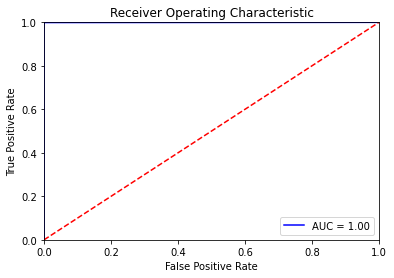

In [20]:
# Importing all necessary libraries
from sklearn.metrics import roc_curve, auc

fpr, tpr, threshold = roc_curve(y_test, y_prediction, pos_label=1)
roc_auc = auc(fpr, tpr)

# Printing AUC
print(f"AUC for our classifier is: {roc_auc}")

# Plotting the ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### ROC _ CURVE IS NOT SUPPORTED FOR MULTICLASS LABELS :_(

In [21]:
#generating a report to extract the measure of interest using built-in sklearn function
report = classification_report(y_test, y_prediction,digits=3,output_dict = True)

In [22]:
report

{'0': {'precision': 0.9980144112414872,
  'recall': 0.9998901822973864,
  'f1-score': 0.9989514162176163,
  'support': 555466},
 '1': {'precision': 0.999952897316923,
  'recall': 0.9991474337756647,
  'f1-score': 0.999550003280422,
  'support': 1296087},
 'accuracy': 0.9993702583722961,
 'macro avg': {'precision': 0.9989836542792051,
  'recall': 0.9995188080365256,
  'f1-score': 0.9992507097490191,
  'support': 1851553},
 'weighted avg': {'precision': 0.999371351389597,
  'recall': 0.9993702583722961,
  'f1-score': 0.9993704271292514,
  'support': 1851553}}

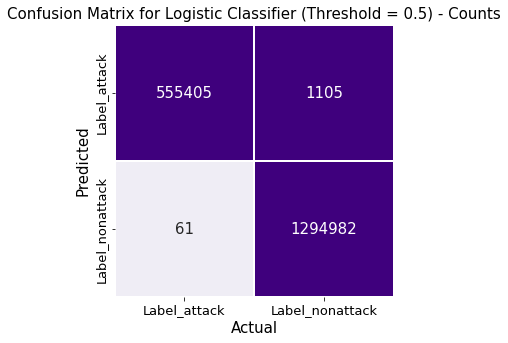

In [23]:
import sklearn
cm_logis = sklearn.metrics.confusion_matrix(y_test, y_prediction)
#put it into a dataframe
cm_logis_df = pd.DataFrame(cm_logis)

#plot CM
fig, ax = plt.subplots(figsize = (5,5))
sns.heatmap(pd.DataFrame(cm_logis_df.T), annot=True, annot_kws={"size": 15}, cmap="Purples", vmin=0, vmax=500, fmt='.0f', linewidths=1, linecolor="white", cbar=False,
           xticklabels=cols, yticklabels=cols)
plt.ylabel("Predicted", fontsize=15)
plt.xlabel("Actual", fontsize=15)
ax.set_xticklabels(cols, fontsize=13)
ax.set_yticklabels(cols, fontsize=13)
plt.title("Confusion Matrix for Logistic Classifier (Threshold = 0.5) - Counts", fontsize=15)
plt.show()